# Plot abstraction level in multiplot

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import string
import cartopy
import cartopy.crs as ccrs
import seaborn as sns
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from pathlib import Path
from glob import glob

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Set paths
ROOT = Path('/gpfs/work1/0/wtrcycle/users/jaerts/model_refinement_pub/')
RESULTS = f'{ROOT}/results/'
AUXDIR = f'{ROOT}/aux_data/'

In [3]:
def positive_feature_abs(df, df_abs, model_name):
    df[df.Importance < 0] = np.nan
    df = df.dropna()
    df = df.join(df_abs)
    df = df.reset_index()
    df = df.set_index('Fold')

    df['Model'] = model_name

    # Loop folds and calculate fraction of total importance per fold
    dataframes = []
    folds = list(range(0,10))
    for fold in folds:
        df_fold = df.loc[float(fold)]
        df_fold.drop(columns=['Benchmark Score', 'index'])
        df_fold_sum = df_fold.groupby(df_fold.Classes).sum()
        df_fold_sum['Fraction of Total Feature Importance'] = df_fold_sum.Importance / df_fold_sum.Importance.sum()
        df_fold_sum['Fold'] = [fold] * len(df_fold_sum) 
        df_fold_sum['Model'] = [model_name] * len(df_fold_sum) 
        dataframes.append(df_fold_sum)

    df_out = pd.concat(dataframes)

    return df_out

In [4]:
variable = 'soil_moisture'

df_wflow = pd.read_csv(f'{RESULTS}/rf_feature_selection/feature_importance/fold_feature_importance_rf_wflow_{variable}.csv', index_col='Feature')
df_pcrglob = pd.read_csv(f'{RESULTS}/rf_feature_selection/feature_importance/fold_feature_importance_rf_pcrglob_{variable}.csv', index_col='Feature')
df_delta_wp = pd.read_csv(f'{RESULTS}/rf_feature_selection/feature_importance/fold_feature_importance_rf_delta_wp_{variable}.csv', index_col='Feature')

df_abs = pd.read_csv(f'{AUXDIR}/rf_features/independent_variable_abstraction_level.csv', index_col='Features')

In [5]:
dataframes_streamflow = []
dataframes_streamflow.append(positive_feature_abs(df_wflow, df_abs, 'wflow_sbm'))
dataframes_streamflow.append(positive_feature_abs(df_pcrglob, df_abs, 'PCR-GLOBWB'))
dataframes_streamflow.append(positive_feature_abs(df_delta_wp, df_abs, 'delta(W-P)'))
# dataframes_streamflow.append(positive_feature_abs(df_delta_pw, df_abs, 'delta(P-W)'))

df_streamflow = pd.concat(dataframes_streamflow)
df_streamflow = df_streamflow.reset_index()

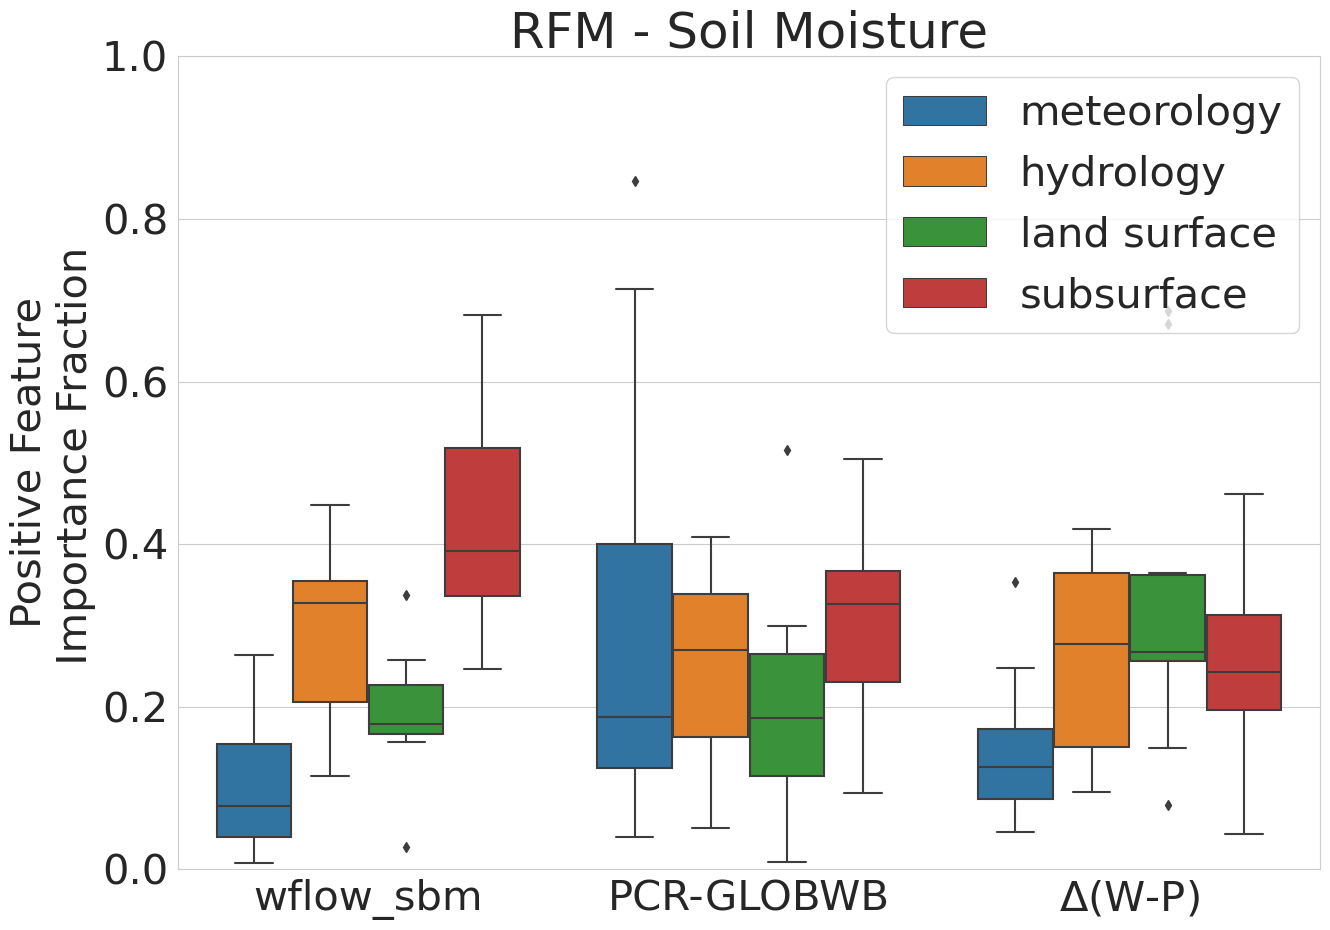

In [9]:
matplotlib.rcParams.update({'font.size': 30})
sns.set_style("whitegrid")
sns.color_palette("tab10")
fig, ax = plt.subplots(1,1,figsize=(14, 10))

df_streamflow['Classes'] = pd.Categorical(df_streamflow['Classes'], ["meteorology", "hydrology", "land surface", "subsurface"])
ax1 = sns.boxplot(ax=ax, data=df_streamflow, y="Fraction of Total Feature Importance", x="Model", hue="Classes")
ax1.set(ylim=(0, 1))
ax1.set(xlabel=None) 
ax1.set(ylabel='Positive Feature\n Importance Fraction') 
ax1.set_title(f'RFM - Soil Moisture')
# ax2.set_title(f'RFM - Actual Evaporation')
# ax3.set_title(f'RFM - Soil Moisture')

# ax[0].text(-0.15,1.05, string.ascii_uppercase[0], transform=ax[0].transAxes, 
#             size=40, weight='bold')
# ax[1].text(-0.15,1.05, string.ascii_uppercase[1], transform=ax[1].transAxes, 
#             size=40, weight='bold')
# ax[2].text(-0.15,1.05, string.ascii_uppercase[2], transform=ax[2].transAxes, 
#             size=40, weight='bold')

ax1.legend(loc='upper right')
ax1.set_xticklabels(['wflow_sbm', 'PCR-GLOBWB', '$\Delta$(W-P)'])
# ax1.get_legend().remove()

# ax1.# Put a legend to the right of the current axis
# ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig(f'/home/jaerts/model_refinement_master/new_scripts/figures/6_fig_soil_moisture_abstraction.png', bbox_inches='tight', dpi=500)

# old

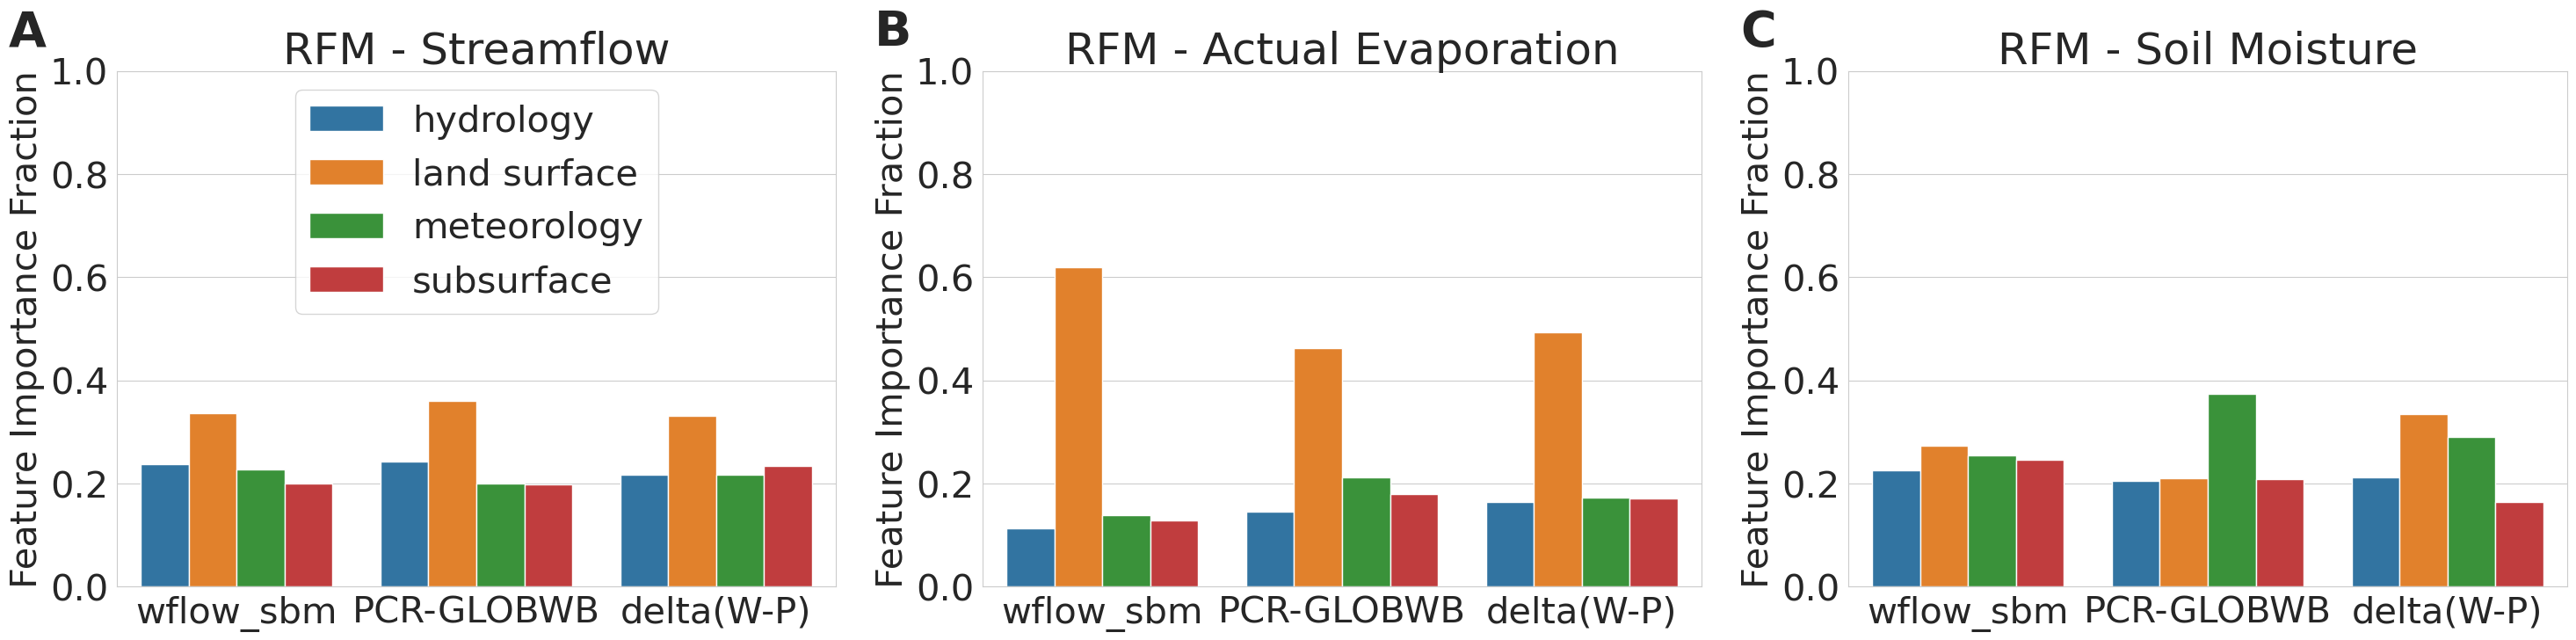

In [50]:
matplotlib.rcParams.update({'font.size': 30})
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,3,figsize=(30, 8))

ax1 = sns.barplot(ax=ax[0], data=df_streamflow, y="Fraction of Total Feature Importance", x="Model", hue="Classes")
ax2 = sns.barplot(ax=ax[1], data=df_evaporation, y="Fraction of Total Feature Importance", x="Model", hue="Classes")
ax3 = sns.barplot(ax=ax[2], data=df_soil_moisture, y="Fraction of Total Feature Importance", x="Model", hue="Classes")

ax1.set(ylim=(0, 1))
ax2.set(ylim=(0, 1))
ax3.set(ylim=(0, 1))

ax1.set(xlabel=None) 
ax2.set(xlabel=None) 
ax3.set(xlabel=None) 

ax1.set(ylabel='Feature Importance Fraction') 
ax2.set(ylabel='Feature Importance Fraction') 
ax3.set(ylabel='Feature Importance Fraction') 

ax2.get_legend().remove()
ax3.get_legend().remove()

ax1.set_title(f'RFM - Streamflow')
ax2.set_title(f'RFM - Actual Evaporation')
ax3.set_title(f'RFM - Soil Moisture')

ax[0].text(-0.15,1.05, string.ascii_uppercase[0], transform=ax[0].transAxes, 
            size=40, weight='bold')
ax[1].text(-0.15,1.05, string.ascii_uppercase[1], transform=ax[1].transAxes, 
            size=40, weight='bold')
ax[2].text(-0.15,1.05, string.ascii_uppercase[2], transform=ax[2].transAxes, 
            size=40, weight='bold')

ax1.legend(loc='upper center')
plt.tight_layout()
# plt.savefig(f'{RESULTS}/plots/Mutiplot_abstraction_level_feature_importance.png', bbox_inches='tight', dpi=500)

In [51]:
df_streamflow

,Classes,Fold,Importance,Model,Fraction of Total Feature Importance
0,hydrology,4.5,0.015099,wflow_sbm,0.236819
1,land surface,4.5,0.021413,wflow_sbm,0.335864
2,meteorology,4.5,0.014451,wflow_sbm,0.226660
3,subsurface,4.5,0.012793,wflow_sbm,0.200657
4,hydrology,4.5,0.005858,PCR-GLOBWB,0.243117
5,land surface,4.5,0.008665,PCR-GLOBWB,0.359586
6,meteorology,4.5,0.004815,PCR-GLOBWB,0.199831
7,subsurface,4.5,0.004758,PCR-GLOBWB,0.197467
8,hydrology,4.5,0.016586,delta(W-P),0.216816
9,land surface,4.5,0.025388,delta(W-P),0.331866


In [55]:
ax = sns.barplot(ax=ax, data=df_evaporation, x="Fraction of Total Feature Importance", y="Model", hue="Classes")
ax.set(ylabel=None) 
ax.set_xlabel('Drop Column Importance Score')
ax.set_title(f'Feature Importance {variable}')
plt.savefig(f'{RESULTS}/plots/asbtraction_lvl_rf_feature_importance_{variable}.png', bbox_inches='tight')

AttributeError: 'numpy.ndarray' object has no attribute 'barh'

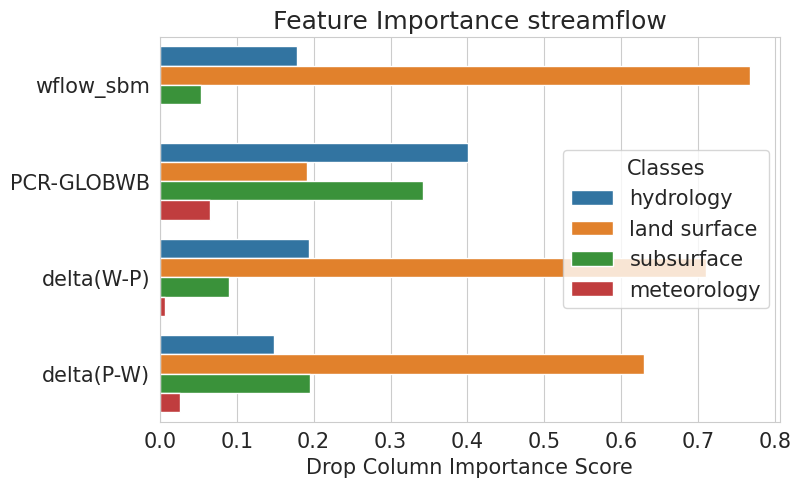

In [9]:
variable = 'streamflow'

df_wflow = pd.read_csv(f'{RESULTS}/rf_feature_selection/feature_importance/feature_rf_wflow_{variable}.csv', index_col='Feature')
df_pcrglob = pd.read_csv(f'{RESULTS}/rf_feature_selection/feature_importance/feature_rf_pcrglob_{variable}.csv', index_col='Feature')
df_delta_wp = pd.read_csv(f'{RESULTS}/rf_feature_selection/feature_importance/feature_rf_delta_wflow_pcrglob_{variable}.csv', index_col='Feature')
df_delta_pw = pd.read_csv(f'{RESULTS}/rf_feature_selection/feature_importance/feature_rf_delta_pcrglob_wflow_{variable}.csv', index_col='Feature')

df_abs = pd.read_csv(f'{AUXDIR}/rf_features/independent_variable_abstraction_level.csv', index_col='Features')

dataframes_streamflow = []
dataframes_streamflow.append(positive_feature_abs(df_wflow, df_abs, 'wflow_sbm'))
dataframes_streamflow.append(positive_feature_abs(df_pcrglob, df_abs, 'PCR-GLOBWB'))
dataframes_streamflow.append(positive_feature_abs(df_delta_wp, df_abs, 'delta(W-P)'))
dataframes_streamflow.append(positive_feature_abs(df_delta_pw, df_abs, 'delta(P-W)'))

df_streamflow = pd.concat(dataframes_streamflow)
df_streamflow = df_streamflow.reset_index()

matplotlib.rcParams.update({'font.size': 15})
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,1,figsize=(8, 5))

ax = sns.barplot(ax=ax, data=df_streamflow, x="Fraction of Total Feature Importance", y="Model", hue="Classes")
ax.set(ylabel=None) 
ax.set_xlabel('Drop Column Importance Score')
ax.set_title(f'Feature Importance {variable}')
plt.savefig(f'{RESULTS}/plots/asbtraction_lvl_rf_feature_importance_{variable}.png', bbox_inches='tight')
